In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

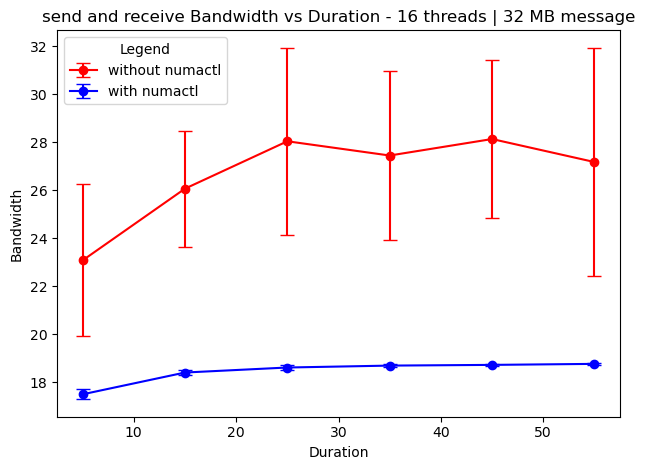

In [2]:
# Load JSON file into a DataFrame
file_path = './data/duration_results_no_numa.json'  # Update this path to your JSON file
df = pd.read_json(file_path)

# Display the first few rows
# print(df.describe())

grouped = df.groupby('duration')['bandwidth_gbps'].agg(['mean', 'std']).reset_index()

# Generate a scatter plot of bandwidth vs duration
plt.errorbar(
    grouped['duration'],
    grouped['mean'],
    yerr=grouped['std'],
    fmt='o',  # circle marker
    capsize=5,  # adds caps to the error bars
    linestyle='-',  # line between points
    color='red',
	label='without numactl'
)

file_path = './data/duration_results_both.json'  # Update this path to your JSON file
df = pd.read_json(file_path)

# Display the first few rows
# print(df.describe())

grouped = df.groupby('duration')['bandwidth_gbps'].agg(['mean', 'std']).reset_index()

# Generate a scatter plot of bandwidth vs duration
plt.errorbar(
    grouped['duration'],
    grouped['mean'],
    yerr=grouped['std'],
    fmt='o',  # circle marker
    capsize=5,  # adds caps to the error bars
    linestyle='-',  # line between points
    color='blue',
	label='with numactl'
)

plt.legend(title='Legend')
plt.ylabel('Bandwidth')
plt.xlabel('Duration')
plt.title('send and receive Bandwidth vs Duration - 16 threads | 32 MB message')
plt.tight_layout()
plt.show()

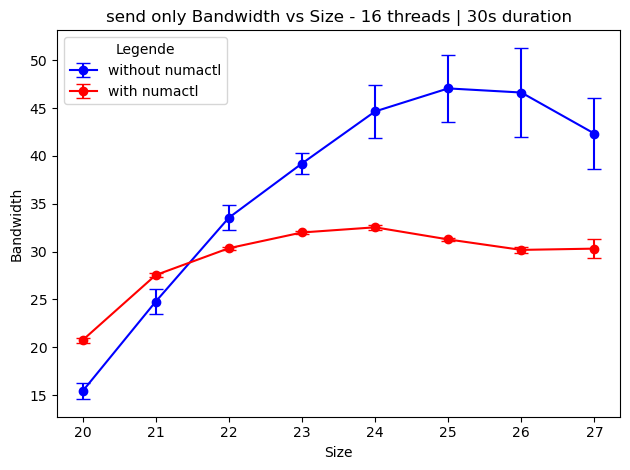

In [3]:
file_path = 'data/nonuma_s_send.json'  # Update this path to your JSON file
no_ctl = pd.read_json(file_path)

# Display the first few rows
# print(no_ctl[np.log2(no_ctl['size']) == 25].describe())

no_ctl['size'] = np.log2(no_ctl['size'])

grouped = no_ctl.groupby('size')['bandwidth_gbps'].agg(['mean', 'std']).reset_index()

# Generate a scatter plot of bandwidth vs duration
plt.errorbar(
    grouped['size'],
    grouped['mean'],
    yerr=grouped['std'],
    fmt='o',  # circle marker
    capsize=5,  # adds caps to the error bars
    linestyle='-',  # line between points
    color='blue',
		label='without numactl'
)

file_path = 'data/numa_s_send.json'  # Update this path to your JSON file
numa_ctl = pd.read_json(file_path)

# Display the first few rows
# print(numa_ctl.describe())

numa_ctl['size'] = np.log2(numa_ctl['size'])

grouped = numa_ctl.groupby('size')['bandwidth_gbps'].agg(['mean', 'std']).reset_index()

# Generate a scatter plot of bandwidth vs duration
plt.errorbar(
    grouped['size'],
    grouped['mean'],
    yerr=grouped['std'],
    fmt='o',  # circle marker
    capsize=5,  # adds caps to the error bars
    linestyle='-',  # line between points
    color='red',
	label='with numactl'
)

plt.ylabel('Bandwidth')
plt.xlabel('Size')
plt.title('send only Bandwidth vs Size - 16 threads | 30s duration')
plt.legend(title='Legende')
plt.tight_layout()
plt.show()

               size  duration  threads  total_time_ns     iterations  \
count  2.300000e+02     230.0    230.0   2.300000e+02     230.000000   
mean   1.167111e+07      30.0     16.0   3.000026e+10  394418.530435   
std    3.020039e+07       0.0      0.0   7.304536e+05  207859.573791   
min    3.200000e+01      30.0     16.0   3.000000e+10    5522.000000   
25%    1.024000e+03      30.0     16.0   3.000002e+10  191634.750000   
50%    6.553600e+04      30.0     16.0   3.000004e+10  518078.500000   
75%    4.194304e+06      30.0     16.0   3.000006e+10  538719.750000   
max    1.342177e+08      30.0     16.0   3.000499e+10  598769.000000   

       bandwidth_gbps  
count      230.000000  
mean         9.690704  
std         12.359235  
min          0.000551  
25%          0.018734  
50%          1.135435  
75%         22.799175  
max         39.434900  


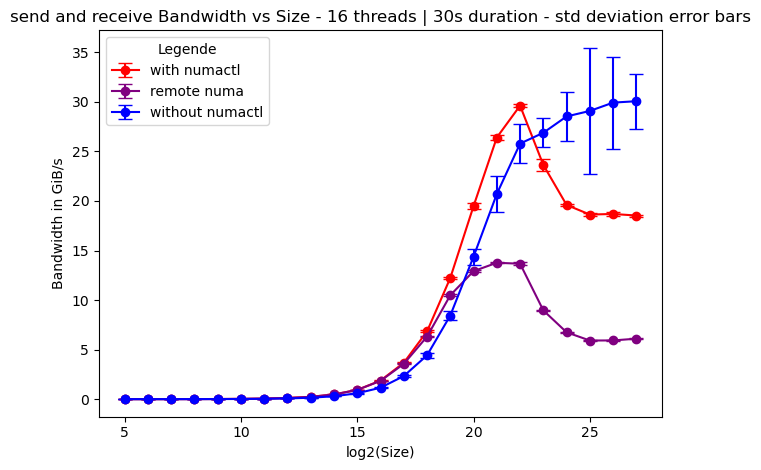

In [ ]:
file_path = 'data/numa_both_send_5-27.json'  # Update this path to your JSON file
numa_ctl = pd.read_json(file_path)

# Display the first few rows
# print(numa_ctl.describe())

numa_ctl['size'] = np.log2(numa_ctl['size'])

grouped = numa_ctl.groupby('size')['bandwidth_gbps'].agg(['mean', 'std']).reset_index()

# Generate a scatter plot of bandwidth vs duration
plt.errorbar(
    grouped['size'],
    grouped['mean'],
    yerr=grouped['std'],
    fmt='o',  # circle marker
    capsize=5,  # adds caps to the error bars
    linestyle='-',  # line between points
    color='red',
	label='with numactl'
)

file_path = 'data/numar_both_send_5-27.json'  # Update this path to your JSON file
numa_remote = pd.read_json(file_path)

# Display the first few rows
# print(numa_remote.describe())

numa_remote['size'] = np.log2(numa_remote['size'])

grouped = numa_remote.groupby('size')['bandwidth_gbps'].agg(['mean', 'std']).reset_index()

# Generate a scatter plot of bandwidth vs duration
plt.errorbar(
    grouped['size'],
    grouped['mean'],
    yerr=grouped['std'],
    fmt='o',  # circle marker
    capsize=5,  # adds caps to the error bars
    linestyle='-',  # line between points
    color='purple',
	label='remote numa'
)

file_path = 'data/nonuma_both_send_5-27.json'  # Update this path to your JSON file
nonuma = pd.read_json(file_path)

# Display the first few rows
print(nonuma.describe())

nonuma['size'] = np.log2(nonuma['size'])

grouped = nonuma.groupby('size')['bandwidth_gbps'].agg(['mean', 'std']).reset_index()

# Generate a scatter plot of bandwidth vs duration
plt.errorbar(
    grouped['size'],
    grouped['mean'],
    yerr=grouped['std'],
    fmt='o',  # circle marker
    capsize=5,  # adds caps to the error bars
    linestyle='-',  # line between points
    color='blue',
	label='without numactl'
)

plt.ylabel('Bandwidth in GiB/s')
plt.xlabel('log2(Size)')
plt.title('send and receive Bandwidth vs Size - 16 threads | 30s duration - std deviation error bars')
plt.legend(title='Legende')
plt.tight_layout()
plt.xlim(20, 27)  # Set x-axis limits
plt.show()

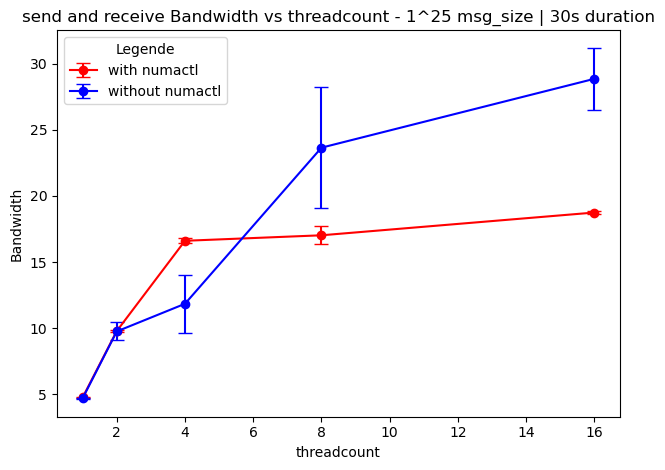

In [5]:
file_path = 'data/numa_thread_send_25.json'  # Update this path to your JSON file
numa_ctl = pd.read_json(file_path)

# Display the first few rows
# print(numa_ctl.describe())

numa_ctl['size'] = np.log2(numa_ctl['size'])

grouped = numa_ctl.groupby('threads')['bandwidth_gbps'].agg(['mean', 'std']).reset_index()

# Generate a scatter plot of bandwidth vs duration
plt.errorbar(
    grouped['threads'],
    grouped['mean'],
    yerr=grouped['std'],
    fmt='o',  # circle marker
    capsize=5,  # adds caps to the error bars
    linestyle='-',  # line between points
    color='red',
	label='with numactl'
)

file_path = 'data/nonuma_thread_send_25.json'  # Update this path to your JSON file
no_numa = pd.read_json(file_path)

# Display the first few rows
# print(numa_ctl.describe())

no_numa['size'] = np.log2(no_numa['size'])

grouped = no_numa.groupby('threads')['bandwidth_gbps'].agg(['mean', 'std']).reset_index()

# Generate a scatter plot of bandwidth vs duration
plt.errorbar(
    grouped['threads'],
    grouped['mean'],
    yerr=grouped['std'],
    fmt='o',  # circle marker
    capsize=5,  # adds caps to the error bars
    linestyle='-',  # line between points
    color='blue',
	label='without numactl'
)

plt.ylabel('Bandwidth')
plt.xlabel('threadcount')
plt.title('send and receive Bandwidth vs threadcount - 1^25 msg_size | 30s duration')
plt.legend(title='Legende')
plt.tight_layout()
plt.show()

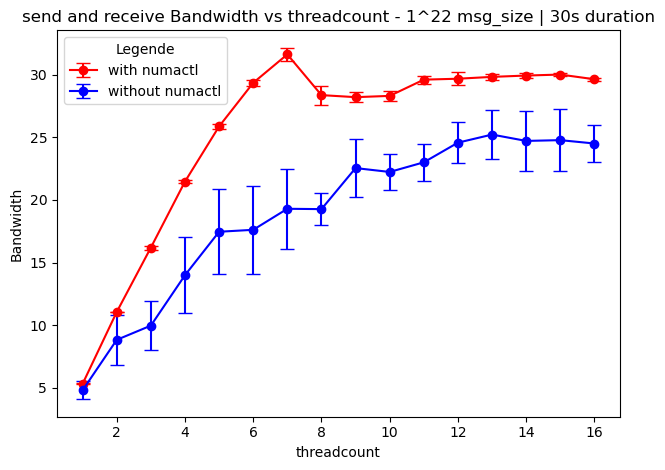

In [6]:
file_path = 'data/numa_thread_send_22.json'  # Update this path to your JSON file
numa_ctl = pd.read_json(file_path)

# Display the first few rows
# print(numa_ctl.describe())

numa_ctl['size'] = np.log2(numa_ctl['size'])

grouped = numa_ctl.groupby('threads')['bandwidth_gbps'].agg(['mean', 'std']).reset_index()

# Generate a scatter plot of bandwidth vs duration
plt.errorbar(
    grouped['threads'],
    grouped['mean'],
    yerr=grouped['std'],
    fmt='o',  # circle marker
    capsize=5,  # adds caps to the error bars
    linestyle='-',  # line between points
    color='red',
	label='with numactl'
)

file_path = 'data/nonuma_thread_send_22.json'  # Update this path to your JSON file
no_numa = pd.read_json(file_path)

# Display the first few rows
# print(numa_ctl.describe())

no_numa['size'] = np.log2(no_numa['size'])

grouped = no_numa.groupby('threads')['bandwidth_gbps'].agg(['mean', 'std']).reset_index()

# Generate a scatter plot of bandwidth vs duration
plt.errorbar(
    grouped['threads'],
    grouped['mean'],
    yerr=grouped['std'],
    fmt='o',  # circle marker
    capsize=5,  # adds caps to the error bars
    linestyle='-',  # line between points
    color='blue',
	label='without numactl'
)

plt.ylabel('Bandwidth')
plt.xlabel('threadcount')
plt.title('send and receive Bandwidth vs threadcount - 1^22 msg_size | 30s duration')
plt.legend(title='Legende')
plt.tight_layout()
plt.show()

In [19]:
filepath = 'test.json'
df = pd.read_json(filepath)

# Display the first few rows

df['send'] = df['t2'] - df['t1']
df['receive'] = df['t4'] - df['t3']
df['t3-t2'] = df['t3'] - df['t2']
df['total'] = df['t4'] - df['t1']
df['bandwidth_gbps'] = df['size'] / (df['total'] * 1e9)

# print(df.head())
print(df[df['t3-t2'] < 0].head())
df.describe()

                 type  size  threads                 t1                 t2  \
4398  receive_latency  1024        8  15562694647012070  15562694647043721   
5215  receive_latency  1024        8  15562694678993421  15562694683011949   
7636  receive_latency  1024        8  15562694769010157  15562694769071999   

                     t3                 t4     send  receive  t3-t2    total  \
4398  15562694647043695  15562694647062557    31651    18862    -26    50487   
5215  15562694683011736  15562694683029745  4018528    18009   -213  4036324   
7636  15562694769071997  15562694769091191    61842    19194     -2    81034   

      bandwidth_gbps  
4398    2.028245e-11  
5215    2.536962e-13  
7636    1.263667e-11  


,size,threads,t1,t2,t3,t4,send,receive,t3-t2,total,bandwidth_gbps
count,10000.0,10000.0,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,1024.0,8.0,1.556269e+16,1.556269e+16,1.556269e+16,1.556269e+16,2.672129e+04,19922.057300,137670.154200,1.843135e+05,1.198906e-11
std,0.0,0.0,8.467735e+07,8.467900e+07,8.475703e+07,8.475669e+07,1.073889e+05,5583.098448,171333.517304,1.990727e+05,8.552408e-12
min,1024.0,8.0,1.556269e+16,1.556269e+16,1.556269e+16,1.556269e+16,1.692600e+04,16410.000000,-213.000000,3.863000e+04,2.515529e-13
25%,1024.0,8.0,1.556269e+16,1.556269e+16,1.556269e+16,1.556269e+16,2.049800e+04,18288.000000,117.000000,4.648300e+04,5.640475e-12
50%,1024.0,8.0,1.556269e+16,1.556269e+16,1.556269e+16,1.556269e+16,2.095200e+04,20314.000000,76028.000000,1.173270e+05,8.727744e-12
75%,1024.0,8.0,1.556269e+16,1.556269e+16,1.556269e+16,1.556269e+16,2.793325e+04,20728.000000,139425.750000,1.815450e+05,2.202956e-11
max,1024.0,8.0,1.556269e+16,1.556269e+16,1.556269e+16,1.556269e+16,4.018528e+06,467725.000000,504435.000000,4.070715e+06,2.650790e-11
